In [3]:
#pip install scipy
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 23.3 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ---------------------------------------- 478.0/478.0 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 54.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#import commonly used libraries
import pandas as pd  
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
df_train = pd.read_csv('train-en.csv')

In [6]:
#import training data
x_train=pd.read_csv('train-en.csv', usecols=["wind_speed48M"]) 
y_train=pd.read_csv('train-en.csv', usecols=["Output"]) 

In [7]:
#check for missing values in x_train
x_train.isna().sum()

wind_speed48M    0
dtype: int64

In [8]:
#check for missing values in y_train
y_train.isna().sum()

Output    0
dtype: int64

In [9]:
x_train

,wind_speed48M
0,8.490
1,8.395
2,8.300
3,8.205
4,8.110
...,...
52503,4.920
52504,5.030
52505,5.030
52506,5.030


In [10]:
y_train

,Output
0,79168
1,75124
2,76072
3,67964
4,69988
...,...
52503,13688
52504,17624
52505,18528
52506,15836


#### Basic Statistics

<Figure size 1280x960 with 0 Axes>

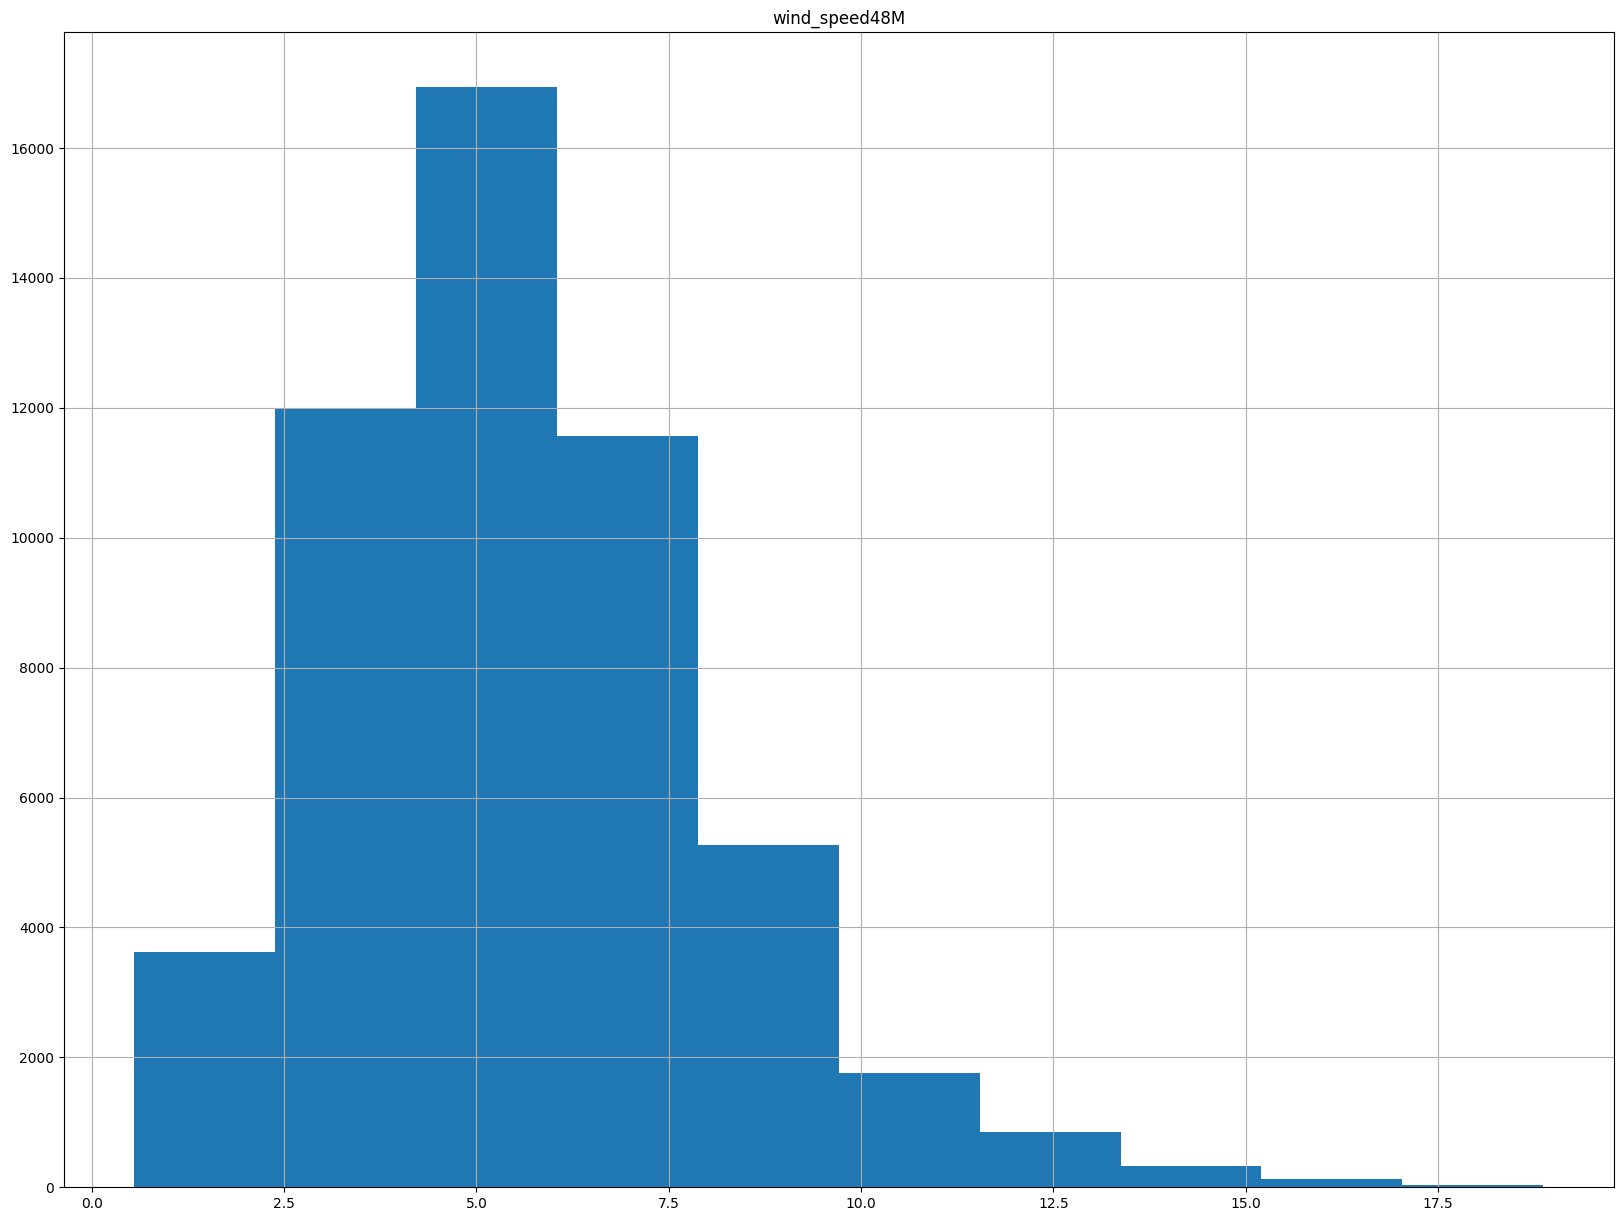

In [11]:
#check distribution of windspeed
plt.figure(dpi=200)
x_train.hist(figsize = (20,15))
plt.show()

<Figure size 1280x960 with 0 Axes>

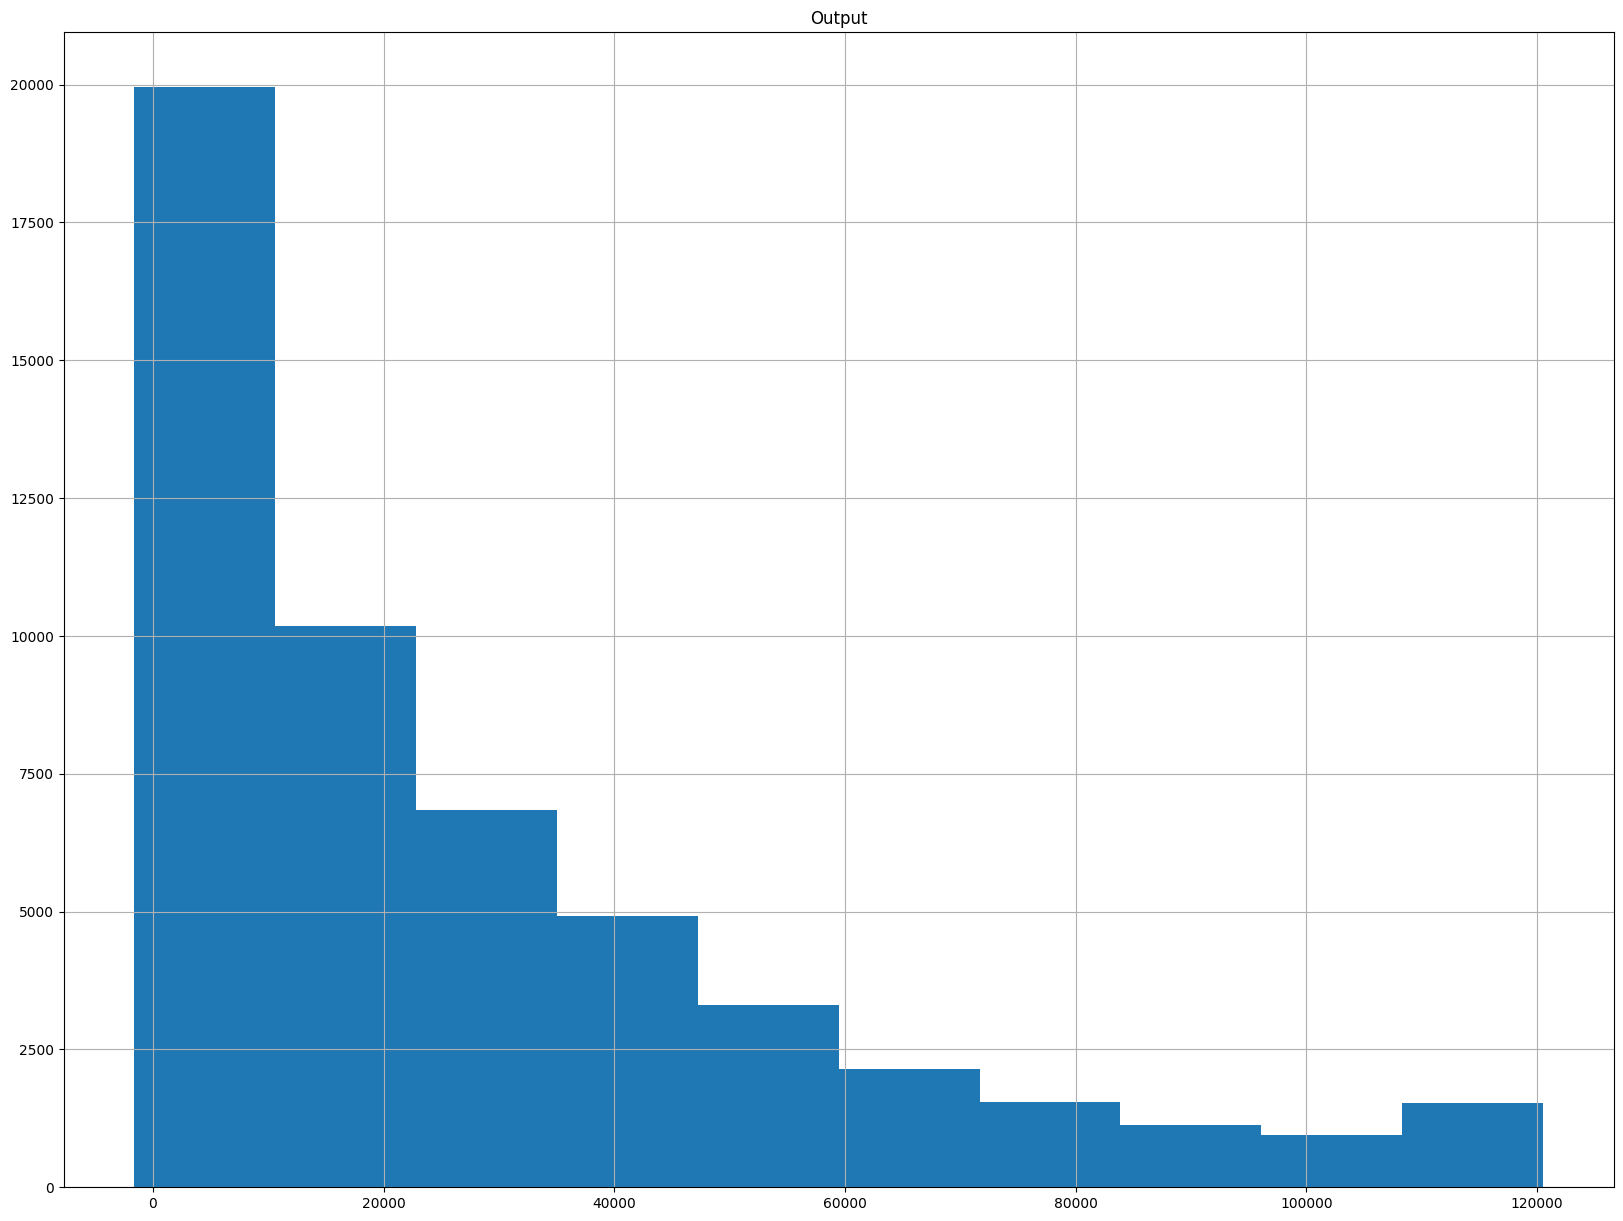

In [12]:
#check distribution of output
plt.figure(dpi=200)
y_train.hist(figsize = (20,15))
plt.show()

In [13]:
#mean of x_train
x_train.mean()

wind_speed48M    5.626846
dtype: float64

In [14]:
#mean of y_train
y_train.mean()

Output    27293.661461
dtype: float64

In [18]:
# Combine x_train and y_train for computing statistics and correlation
combined_data = pd.concat([x_train, y_train], axis=1)

# Basic statistics
basic_stats_corrected = combined_data.describe()

# Correlation
correlation_corrected = combined_data.corr()

basic_stats_corrected, correlation_corrected


(       wind_speed48M         Output
 count   52508.000000   52508.000000
 mean        5.626846   27293.661461
 std         2.466787   29313.824237
 min         0.550000   -1628.000000
 25%         3.925000    4928.000000
 50%         5.330000   17300.000000
 75%         6.965000   40415.000000
 max        18.870000  120520.000000,
                wind_speed48M    Output
 wind_speed48M       1.000000  0.889447
 Output              0.889447  1.000000)

The correlation coefficient between "wind_speed48M" and "Output" is 0.889, indicating a strong positive relationship between the two variables.

In [20]:
# Compute the correlation for the entire training dataset
df_train_correlation = combined_data.corr()
df_train_correlation

,wind_speed48M,Output
wind_speed48M,1.000000,0.889447
Output,0.889447,1.000000


In [21]:
# Compute the correlation for the entire dataframe
df_train_correlation = df_train.corr()

df_train_correlation

C:\Users\684681\AppData\Local\Temp\ipykernel_11676\4016189313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_correlation = df_train.corr()


,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
wind_speed48M,1.000000,0.982453,0.958376,0.126413,0.123056,0.121065,0.980281,0.981269,0.981838,0.982227,0.982453,0.982369,0.982194,0.981865,0.981349,-2.313416e-05,6.193204e-03,0.889447
wind_speed100M,0.982453,1.000000,0.992113,0.093161,0.094450,0.097180,0.998020,0.998975,0.999514,0.999802,0.999991,0.999808,0.999542,0.999067,0.998291,-2.677297e-05,5.655206e-02,0.888803
wind_speed152M,0.958376,0.992113,1.000000,0.071982,0.074658,0.079498,0.990102,0.991048,0.991628,0.991905,0.992099,0.991887,0.991613,0.991130,0.990248,-2.998525e-05,7.744337e-02,0.875016
wind_direction48M,0.126413,0.093161,0.071982,1.000000,0.948389,0.918411,0.090588,0.091225,0.091921,0.092738,0.093215,0.093544,0.094032,0.095121,0.096000,-1.697860e-03,-2.923861e-02,0.117044
wind_direction100M,0.123056,0.094450,0.074658,0.948389,1.000000,0.967467,0.092224,0.092726,0.093375,0.094042,0.094508,0.094722,0.095064,0.095921,0.096700,-1.365760e-03,-2.924203e-02,0.113851
wind_direction152M,0.121065,0.097180,0.079498,0.918411,0.967467,1.000000,0.095220,0.095619,0.096266,0.096887,0.097229,0.097394,0.097657,0.098456,0.099104,-1.084837e-03,-2.642469e-02,0.111899
wind_speed_100MP10,0.980281,0.998020,0.990102,0.090588,0.092224,0.095220,1.000000,0.999414,0.998924,0.998509,0.997995,0.997481,0.996861,0.995924,0.994582,-2.615521e-05,5.494955e-02,0.885870
wind_speed_100MP20,0.981269,0.998975,0.991048,0.091225,0.092726,0.095619,0.999414,1.000000,0.999656,0.999348,0.998956,0.998550,0.998043,0.997250,0.996089,-2.614688e-05,5.541125e-02,0.886977
wind_speed_100MP30,0.981838,0.999514,0.991628,0.091921,0.093375,0.096266,0.998924,0.999656,1.000000,0.999787,0.999499,0.999186,0.998775,0.998106,0.997100,-2.610919e-05,5.625096e-02,0.887776
wind_speed_100MP40,0.982227,0.999802,0.991905,0.092738,0.094042,0.096887,0.998509,0.999348,0.999787,1.000000,0.999790,0.999540,0.999205,0.998635,0.997737,-2.629489e-05,5.603817e-02,0.888227


<AxesSubplot:>

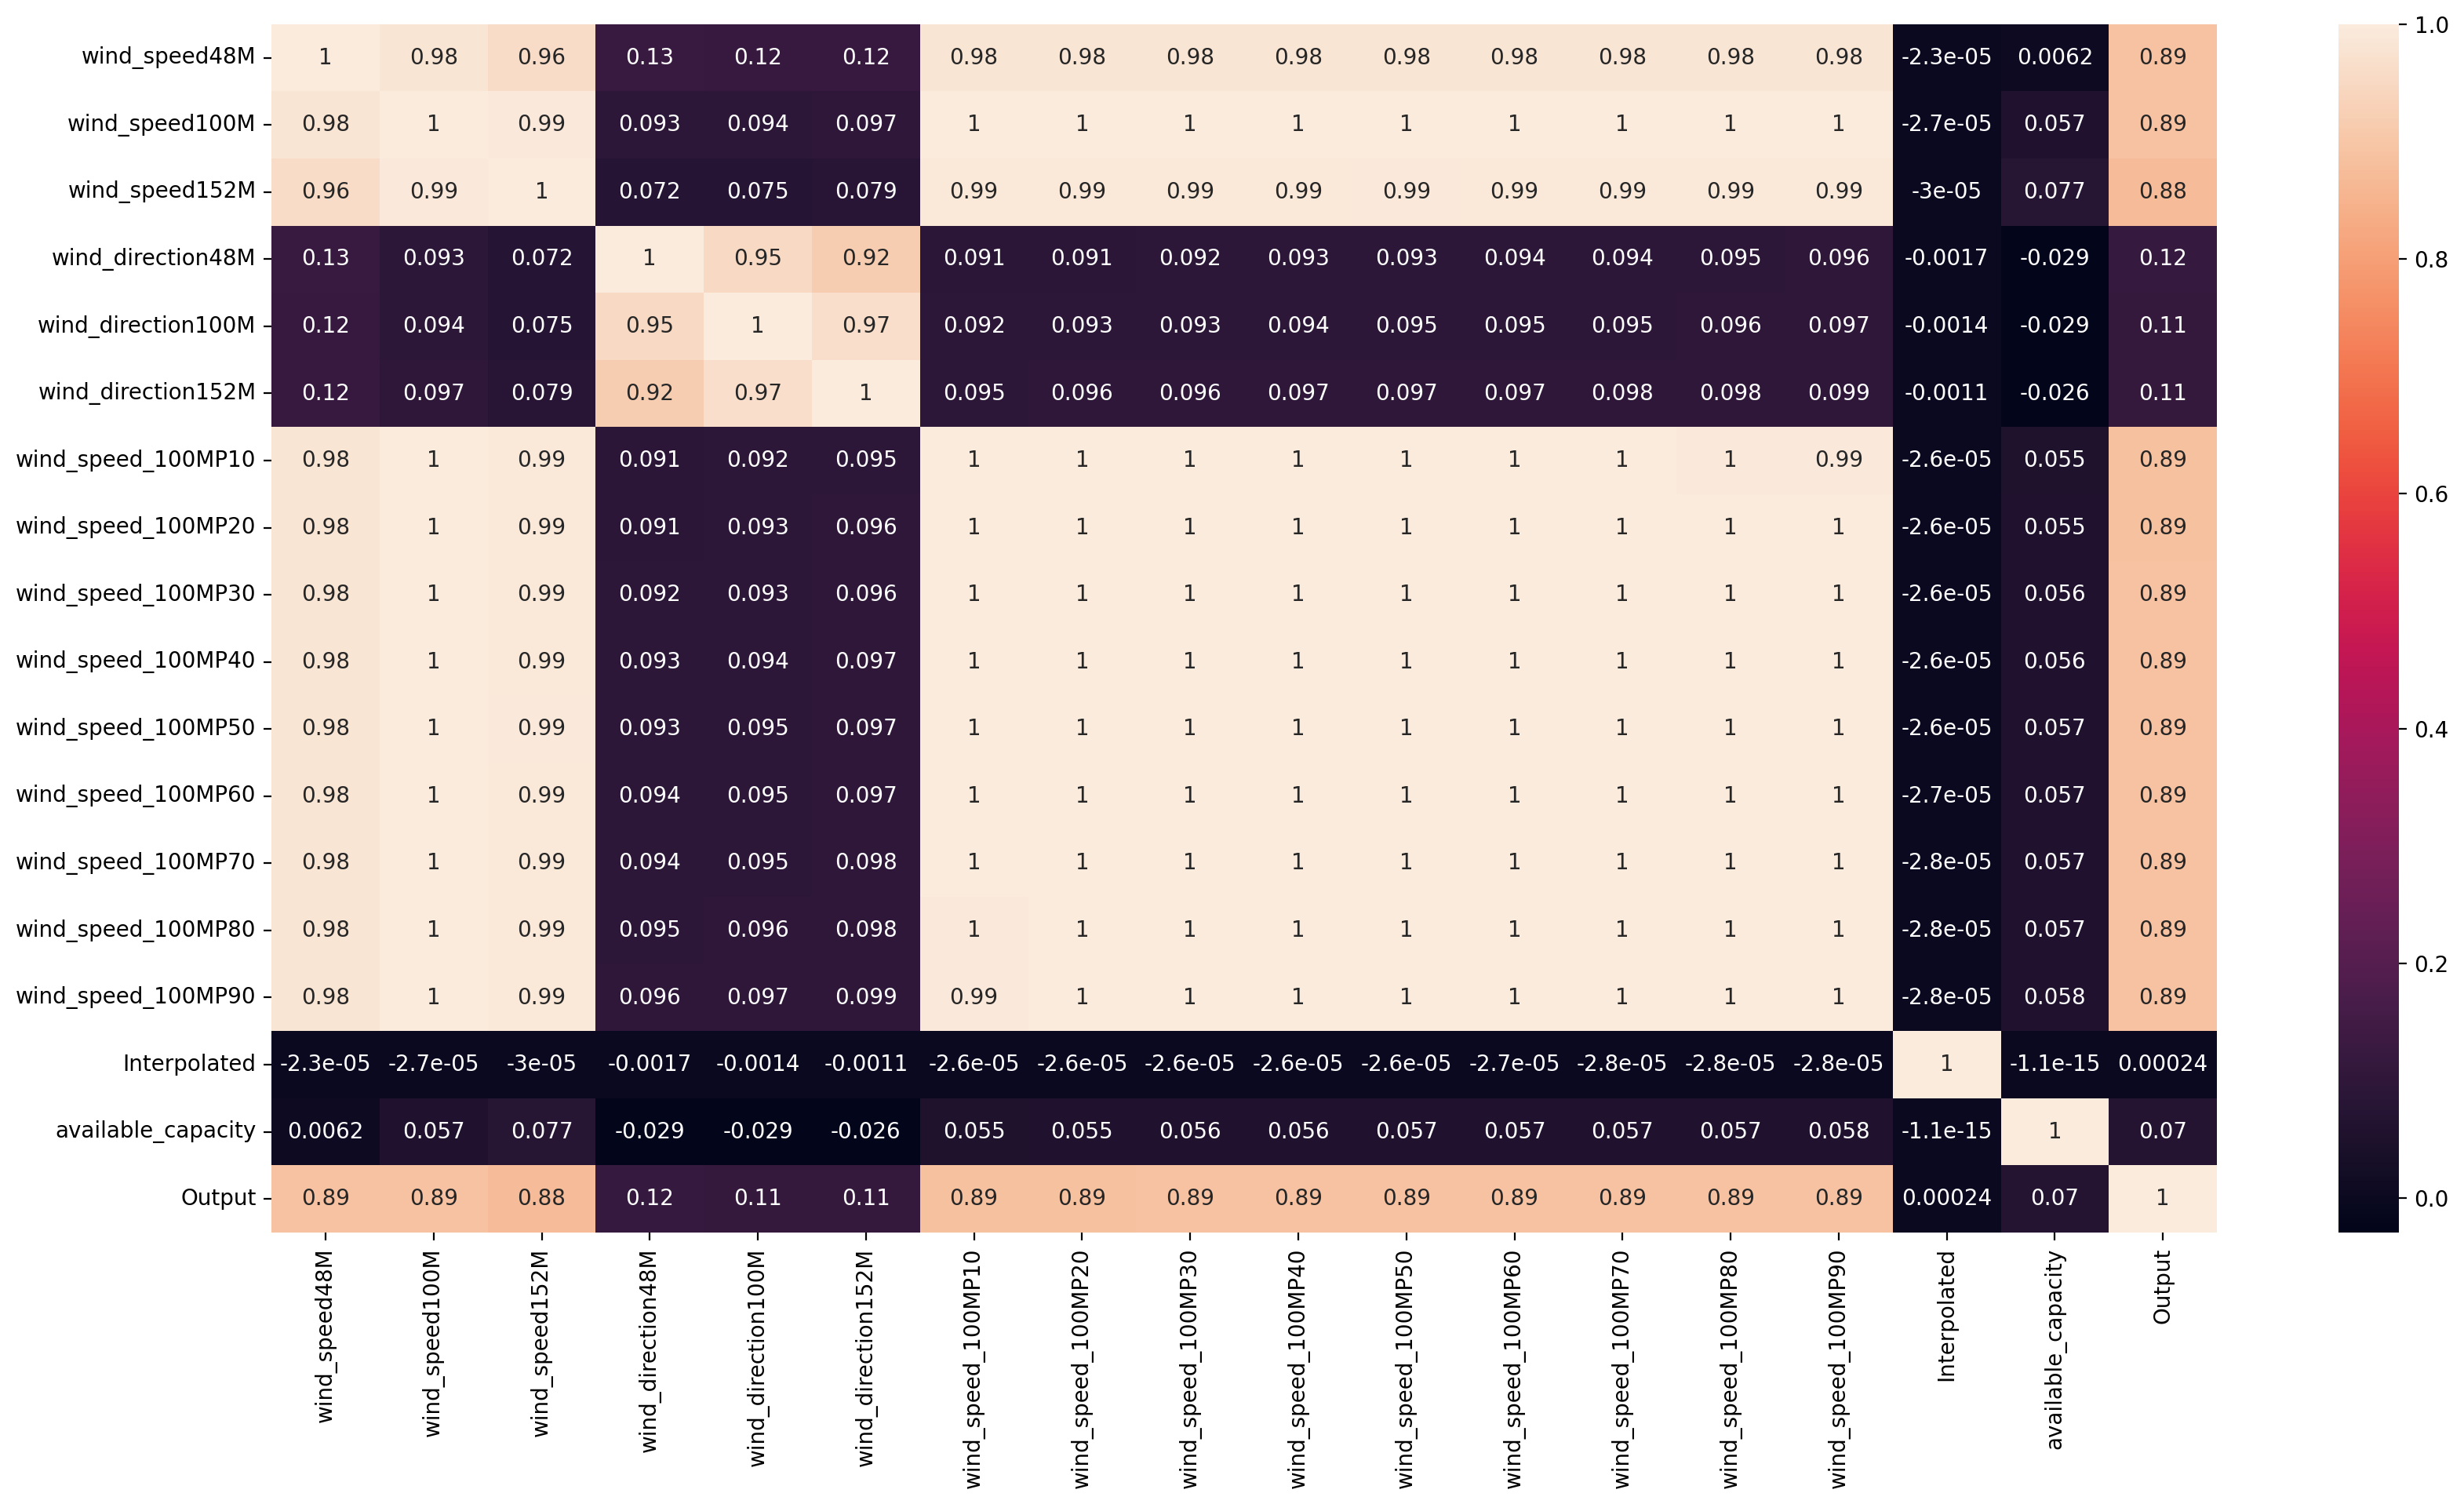

In [50]:
#heatmap to check for correlation
plt.figure(dpi=200, figsize=(20,10))
sns.heatmap(df_train.corr(), annot = True) # checking for correlation to see if any of the variables have strong relationship

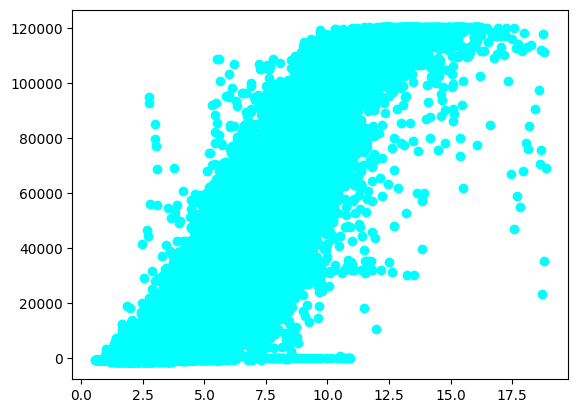

In [42]:
#visualization

import matplotlib.pyplot as plt 
plt.scatter(x_train["wind_speed48M"], y_train["Output"], color="cyan") 
plt.show()

In [28]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.2/9.2 MB 53.7 MB/s eta 0:00:00
     ---------------------------------------- 302.2/302.2 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


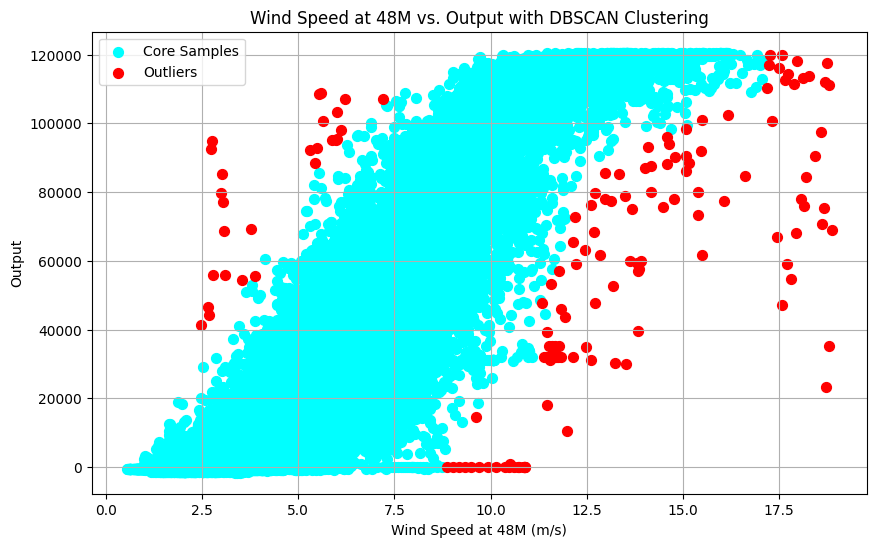

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data for better performance of DBSCAN
scaled_data = StandardScaler().fit_transform(pd.concat([x_train, y_train], axis=1))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=50).fit(scaled_data)

# Define labels for core samples, border points, and outliers
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_train[core_samples_mask], y_train[core_samples_mask], c='cyan', s=50, label='Core Samples')
plt.scatter(x_train[~core_samples_mask], y_train[~core_samples_mask], c='red', s=50, label='Outliers')
plt.title("Wind Speed at 48M vs. Output with DBSCAN Clustering")
plt.xlabel("Wind Speed at 48M (m/s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


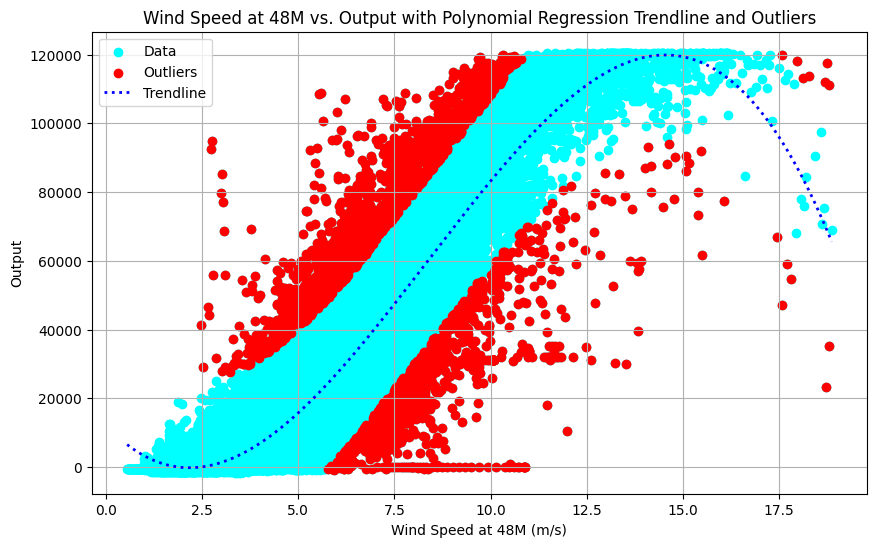

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


# Polynomial regression with degree 3
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x_train, y_train)

# Predicted output using polynomial regression
x_sorted = x_train.sort_values(by="wind_speed48M")
predicted_poly_output = polyreg.predict(x_sorted)

# Calculate residuals for polynomial regression
poly_residuals = y_train["Output"].values - polyreg.predict(x_train).flatten()

# Define a threshold for outliers based on polynomial regression residuals
poly_outlier_threshold = np.percentile(np.abs(poly_residuals), 95)  # 95th percentile of the residuals
poly_outliers = np.where(np.abs(poly_residuals) > poly_outlier_threshold)

# Scatter plot with polynomial trendline and outliers
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="cyan", label="Data")
plt.scatter(x_train.iloc[poly_outliers], y_train.iloc[poly_outliers], color="red", label="Outliers")
plt.plot(x_sorted, predicted_poly_output, color="blue", linewidth=2, linestyle='dotted', label="Trendline")
plt.title("Wind Speed at 48M vs. Output with Polynomial Regression Trendline and Outliers")
plt.xlabel("Wind Speed at 48M (m/s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# given a set of features, e.g. wind speed and output -
#decides whether or not the turbine is functioning correctly

def is_turbine_functioning_correctly(wind_speed, output):
    """
    Decide if the turbine is functioning correctly based on wind speed and output.
    
    Parameters:
    - wind_speed: Wind speed at 48M
    - output: Output of the turbine
    
    Returns:
    - bool: True if the turbine is functioning correctly, False otherwise
    """
    # Find the closest wind speed in the training data and get its average output
    closest_wind_speed = avg_output_per_speed.index[np.abs(avg_output_per_speed.index - wind_speed).argmin()]
    reference_output = avg_output_per_speed.loc[closest_wind_speed]
    
    # Ensure we have a scalar value for reference_output
    if isinstance(reference_output, pd.Series):
        reference_output = reference_output.iloc[0]
    
    # If the deviation from the reference output is greater than the threshold, return False
    if abs(output - reference_output) > threshold:
        return False
    return True

# Test the function again
is_turbine_functioning_correctly(test_wind_speed, test_output)


False

#### Regression Model

In [ ]:
# Load evaluation data
x_test = pd.read_csv('/mnt/data/eval-en.csv', usecols=["wind_speed48M"])
y_test = pd.read_csv('/mnt/data/eval-en.csv', usecols=["Output"])

# Train a linear regression model
reg = LinearRegression().fit(x_train, y_train)

# Score the model on training data
scores = reg.score(x_train, y_train)

# Make predictions on the test data
predictions = reg.predict(x_test)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_test["wind_speed48M"], y_test["Output"], color="cyan", label="True Values")
plt.plot(x_test, predictions, color="red", linewidth=3, label="Predictions")
plt.title("Wind Speed at 48M vs. Output with Linear Regression Predictions")
plt.xlabel("Wind Speed at 48M (m/s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

scores


In [34]:
#import test data
x_test=pd.read_csv('eval-en.csv', usecols=["wind_speed48M"]) 
y_test=pd.read_csv('eval-en.csv', usecols=["Output"]) 

In [35]:
#Train a linear regression model
reg = LinearRegression().fit(x_train, y_train)

#Score the model on training data
scores = reg.score(x_train, y_train) 

# Make predictions on the test data
predictions = reg.predict(x_test)

print(predictions)

[[19082.66141229]
 [19875.38570799]
 [20668.11000369]
 ...
 [77532.8661483 ]
 [77532.8661483 ]
 [77532.8661483 ]]


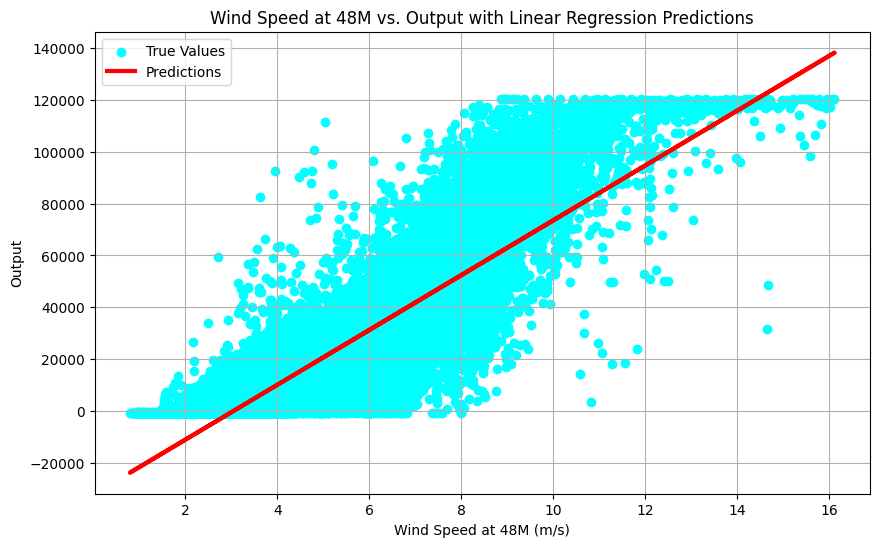

0.7911160999591289

In [36]:
# Visualize using Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_test["wind_speed48M"], y_test["Output"], color="cyan", label="True Values")
plt.plot(x_test, predictions, color="red", linewidth=3, label="Predictions")
plt.title("Wind Speed at 48M vs. Output with Linear Regression Predictions")
plt.xlabel("Wind Speed at 48M (m/s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

scores

The scatter plot visualizes the actual output values (in cyan) against the predicted output values (in red) for the evaluation data, based on the wind speed at 48M.

The Rsquared score for the linear regression model on the training data is approximately 0.7911 which suggests that the model explains about 79.11% of the variance in the target variable, based on the wind speed at 48M

#### Evaluating the Regression Model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test["Output"].values - predictions.flatten()) / y_test["Output"].values)) * 100

mae, mse, rmse, r2, mape

C:\Users\684681\AppData\Local\Temp\ipykernel_11676\3197243701.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test["Output"].values - predictions.flatten()) / y_test["Output"].values)) * 100


(11803.778406874893,
 250526557.06287342,
 15828.030738625492,
 0.7639954710012078,
 inf)

Mean Absolute Percentage Error (MAPE): The result is inf due to some zero values in the Output causing a divide-by-zero error. This suggests that there might be some instances where the actual output was 0, making the percentage error calculation problematic.

While the Rsqaured value of 0.764 suggests that the model explains about 76.4% of the variance in the target variable, the other metrics (MAE, MSE, RMSE) give insights into the average errors made by the model in its predictions.

#### Prediction for an individual data point
To predict the expected output for a specific wind speed (e.g., 8 m/s)

In [38]:
# Predict the expected output for a wind speed of 8 m/s
wind_speed_value = [[8]]  # Reshape to fit the input shape for the regression model
predicted_output_for_8 = reg.predict(wind_speed_value)

predicted_output_for_8[0][0]

C:\Users\684681\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


52377.08183153666

This means that, given our model and the training data, if the wind speed is 8 m/s, we would expect the wind turbine to produce around 52,377.08 units of power.

#### Practical application of the regression model
By examining the residuals (i.e., the difference between the actual and predicted values), we can determine which data points might be indicative of faulty behavior in the wind turbine.

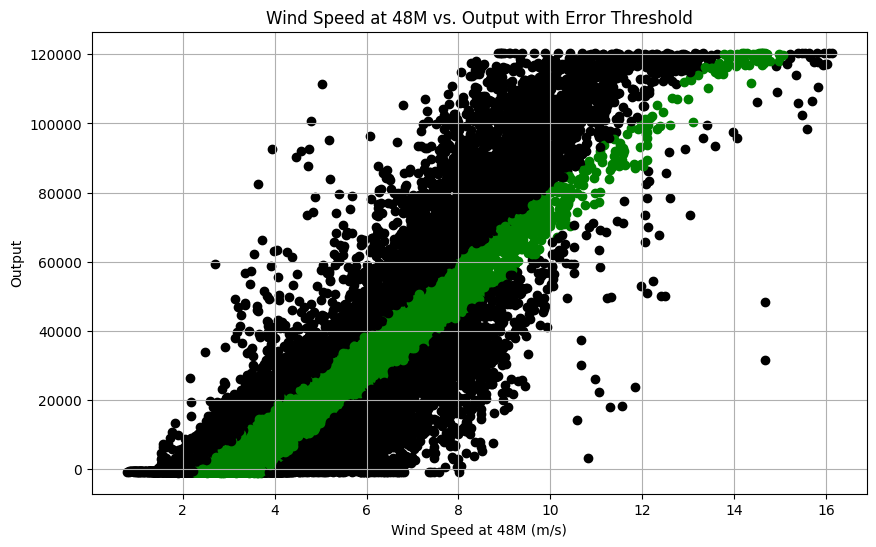

In [39]:
# Initialize a list to store discrete error values (1 for error, 0 for normal)
discrete_error = []

# Plot the data points based on error threshold
plt.figure(figsize=(10, 6))

for i in range(0, len(y_test)):
    error = y_test["Output"].iloc[i] - predictions[i]
    
    if error > 8000 or error < -8000:
        discrete_error.append(1)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test["Output"].iloc[i], color="black")
    else:
        discrete_error.append(0)
        plt.scatter(x_test["wind_speed48M"].iloc[i], y_test["Output"].iloc[i], color="green")

plt.title("Wind Speed at 48M vs. Output with Error Threshold")
plt.xlabel("Wind Speed at 48M (m/s)")
plt.ylabel("Output")
plt.grid(True)
plt.show()


The chart displays the relationship between wind speed at 48M and the power output of the wind farm. We used a regression model to predict the expected output for given wind speeds and then compared these predictions to the actual outputs.

Green Points ("Normal Operation"): These are data points where the actual output values are close to the predicted values from our regression model. The difference (or error) between the predicted and actual output for these points is below the threshold of 8,000 units. This suggests that the wind farm is operating as expected for these wind speeds.

Black Points ("Probably Faulty"): These are data points where the actual output values deviate significantly from the predicted values. The error for these points exceeds the threshold of 8,000 units, which could indicate potential issues or anomalies in the wind farm's operation.

By visualizing these categories, the chart helps in identifying periods where the wind farm's performance might not align with expectations based on wind speed. Such insights can be crucial for maintenance, diagnostics, or further investigation.

#### Further Analysis

Feature Engineering:
Create polynomial features or interaction terms to see if they can improve the regression model's performance.
Extract other relevant features like the hour, day, or month from the timestamp to determine if there are periodic effects.

Other Regression Models:
Test more complex regression models such as Ridge, Lasso, or ElasticNet.
Explore ensemble methods like Random Forest, Gradient Boosting, or XGBoost for regression.

Anomaly Detection:
Implement advanced anomaly detection algorithms like Isolation Forest, One-Class SVM, or Autoencoders to identify anomalous data points.

Model Interpretability:
Use tools like SHAP or LIME to understand the contributions of individual features to the model's predictions.

Clustering:
Group similar operating conditions using clustering algorithms like K-Means, DBSCAN, or Hierarchical Clustering. This can help identify typical operating regimes or unusual conditions.

Classification Model:
Given the labeled data (normal vs. probably faulty), train a classification model to predict these labels based on the input features. This would provide a direct method to predict faults without first estimating the output.

Statistical Tests:
Conduct hypothesis tests to determine if differences in output are statistically significant under different conditions.

Sensitivity Analysis:
Analyze how sensitive the output is to changes in different input features. This can help prioritize which factors are most critical to maintaining optimal output.

Optimization:
Use the insights gained to recommend optimal operating conditions or strategies for maximizing power output or minimizing faults.